In [17]:
import pandas as pd
from statsmodels.regression import linear_model
from patsy import dmatrices
import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA as ARIMA
import numpy as np
import pickle
%matplotlib inline
from statsmodels.tsa.stattools import adfuller, kpss


import statsmodels.graphics.tsaplots as tsa
from matplotlib import pyplot as plt
import statsmodels as sm
from statsmodels.tsa.seasonal import seasonal_decompose

import statsmodels.api as sm
from statsmodels.tsa.ar_model import AutoReg
from pandas.plotting import autocorrelation_plot
from statsmodels.tsa.arima.model import ARIMA

from math import sqrt
from sklearn.metrics import mean_squared_error

from statsmodels.tsa.statespace.sarimax import SARIMAX


In [2]:
df = pickle.load( open( "seattle_data.pkl", "rb" ) )

## Forecasting with ARIMA (1,1,0)

**Forecasting with ARIMA, while using a differencing order of 1, should not perform well given it doesnt account for seasonality or noise components**

In [3]:
model = ARIMA(df.DEMAND, order=(1,1,0))

In [4]:
model_fit = model.fit()

In [5]:
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:                 DEMAND   No. Observations:                47424
Model:                 ARIMA(1, 1, 0)   Log Likelihood             -236436.337
Date:                Sat, 20 Mar 2021   AIC                         472876.674
Time:                        17:19:03   BIC                         472894.207
Sample:                             0   HQIC                        472882.180
                              - 47424                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7498      0.002    385.461      0.000       0.746       0.754
sigma2      1253.2613      3.578    350.290      0.000    1246.249    1260.274
Ljung-Box (L1) (Q):                2155.82   Jarque-

Let’s plot the residuals to ensure there are no patterns (that is, look for constant mean and variance).

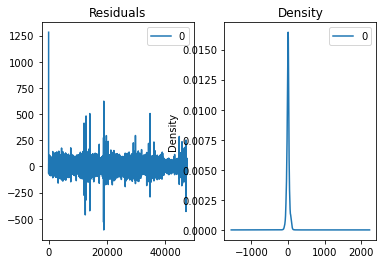

In [6]:
# Plot residual errors
residuals = pd.DataFrame(model_fit.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [9]:
y_pred = model_fit.predict(dynamic=False)

In [10]:
y_pred

0           0.000000
1        1284.744050
2        1273.250917
3        1187.759357
4        1156.007339
            ...     
47419    1260.249450
47420    1289.496697
47421    1302.247248
47422    1270.002202
47423    1221.256055
Name: predicted_mean, Length: 47424, dtype: float64

In [11]:
y_true = df.DEMAND

In [12]:
y_true

0        1282.0
1        1277.0
2        1226.0
3        1186.0
4        1157.0
          ...  
47419    1276.0
47420    1291.0
47421    1279.0
47422    1246.0
47423    1208.0
Name: DEMAND, Length: 47424, dtype: float64

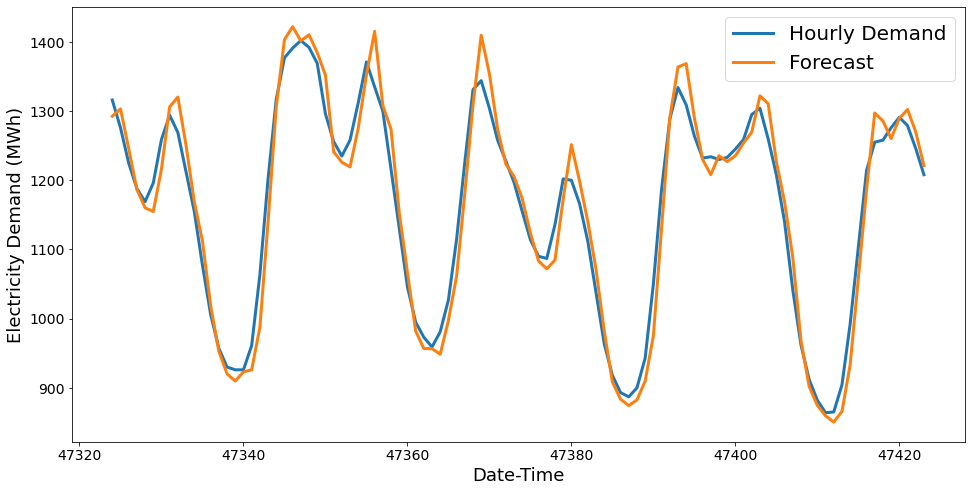

In [15]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true[-100:],linewidth=3, label='Hourly Demand')
plt.plot(y_pred[-100:], linewidth=3, label='Forecast')
plt.xlabel('Date-Time', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

In [14]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

35.886845849094556

## Forecasting with SARIMA (2,1,1)(1,1,1)24

**Forecasting with SARIMA, since it accounts for seasonality and noise components, should perform better than ARIMA**

In [18]:
model = SARIMAX(df.DEMAND, order=(2,1,1), seasonal_order=(1,1,1,24)).fit(dis=-1)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [19]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             DEMAND   No. Observations:                47424
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -212718.183
Date:                            Sat, 20 Mar 2021   AIC                         425448.366
Time:                                    17:38:27   BIC                         425500.964
Sample:                                         0   HQIC                        425464.883
                                          - 47424                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          1.2929      0.002    782.676      0.000       1.290       1.296
ar.L2         -0.3723      0.002   

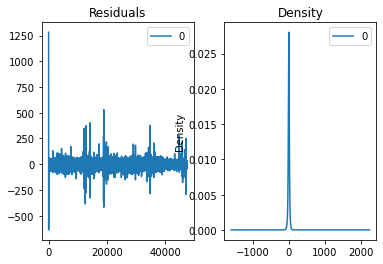

In [20]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [21]:
y_pred = model.predict(dynamic=False)

In [22]:
y_pred

0           0.000000
1        1282.186721
2        1277.033753
3        1225.961300
4        1185.942591
            ...     
47419    1244.235265
47420    1271.183963
47421    1292.950026
47422    1241.993691
47423    1225.467233
Name: predicted_mean, Length: 47424, dtype: float64

In [23]:
y_true = df.DEMAND

In [24]:
y_true

0        1282.0
1        1277.0
2        1226.0
3        1186.0
4        1157.0
          ...  
47419    1276.0
47420    1291.0
47421    1279.0
47422    1246.0
47423    1208.0
Name: DEMAND, Length: 47424, dtype: float64

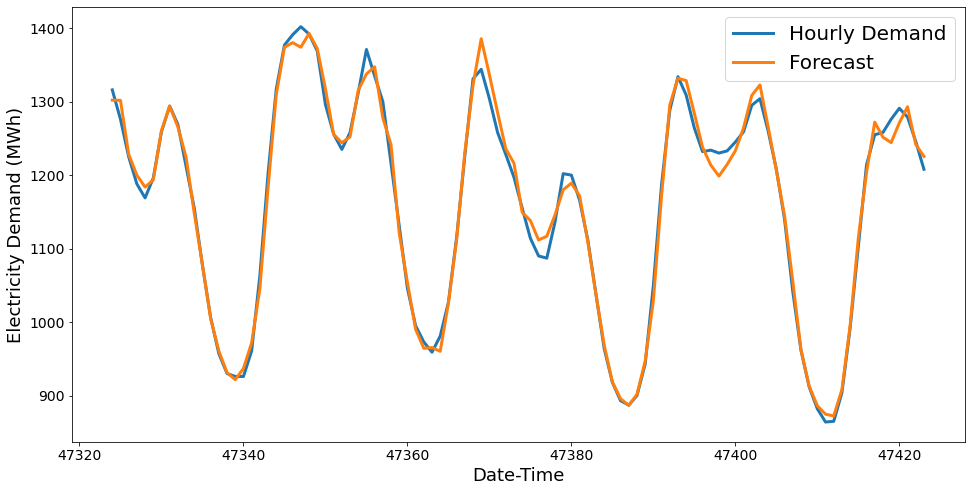

In [25]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true[-100:],linewidth=3, label='Hourly Demand')
plt.plot(y_pred[-100:], linewidth=3, label='Forecast')
plt.xlabel('Date-Time', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

In [26]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

22.52184142410579

RMSE is lower for SARIMA than ARIMA, thus validating additional model complexity

## Forecasting with SARIMAX (2,1,1)(1,1,1)24 with exogenous temperature variable

**Forecasting with SARIMAX, since it accounts for seasonality, noise, and exogenous temperature components, should perform better than SARIMA**

In [27]:
df.head()

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
0,2015-07-02 00:53:00,2015-07-02,74.0,0.0,48.0,CLR,29.94,10.0,Calm,0.0,1282.0
1,2015-07-02 01:53:00,2015-07-02,72.0,0.0,53.0,CLR,29.94,10.0,Variable,3.0,1277.0
2,2015-07-02 02:53:00,2015-07-02,70.0,0.0,55.0,CLR,29.95,10.0,North,3.0,1226.0
3,2015-07-02 03:53:00,2015-07-02,68.0,0.0,59.0,CLR,29.96,10.0,Calm,0.0,1186.0
4,2015-07-02 04:53:00,2015-07-02,68.0,0.0,61.0,CLR,29.97,10.0,West,3.0,1157.0


In [38]:
df.tail(24)

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
47400,2021-03-05 00:53:00,2021-03-05,47.0,0.00,100.0,FEW,29.88,10.0,Calm,0.0,1245.0
47401,2021-03-05 01:53:00,2021-03-05,45.0,0.00,97.0,FEW,29.85,10.0,West,9.0,1259.0
47402,2021-03-05 02:53:00,2021-03-05,45.0,0.00,93.0,FEW,29.85,10.0,Variable,3.0,1295.0
47403,2021-03-05 03:53:00,2021-03-05,45.0,0.00,97.0,OVC,29.83,10.0,Calm,0.0,1304.0
47404,2021-03-05 04:53:00,2021-03-05,45.0,0.00,97.0,BKN,29.83,10.0,Calm,0.0,1260.0
47405,2021-03-05 05:53:00,2021-03-05,45.0,0.00,97.0,OVC,29.81,10.0,Calm,0.0,1208.0
47406,2021-03-05 06:53:00,2021-03-05,45.0,0.00,93.0,FEW,29.81,10.0,South,9.0,1140.0
47407,2021-03-05 07:53:00,2021-03-05,46.0,0.00,89.0,SCT,29.81,10.0,Calm,0.0,1042.0
47408,2021-03-05 08:53:00,2021-03-05,50.0,0.00,71.0,BKN,29.84,10.0,Variable,6.0,962.0
47409,2021-03-05 09:53:00,2021-03-05,53.0,0.00,61.0,BKN,29.87,10.0,South,15.0,912.0


In [28]:
model = SARIMAX(endog=df.DEMAND, exog=df.Temperature, order=(2,1,1), seasonal_order=(1,1,1,24)).fit(dis=-1)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/statespace/sarimax.py:978: UserWarning: Non-invertible starting MA parameters found. Using zeros as starting parameters.
  warn('Non-invertible starting MA parameters found.'


In [29]:
print(model.summary())

                                     SARIMAX Results                                      
Dep. Variable:                             DEMAND   No. Observations:                47424
Model:             SARIMAX(2, 1, 1)x(1, 1, 1, 24)   Log Likelihood             -212717.632
Date:                            Sat, 20 Mar 2021   AIC                         425449.264
Time:                                    18:06:27   BIC                         425510.628
Sample:                                         0   HQIC                        425468.534
                                          - 47424                                         
Covariance Type:                              opg                                         
                  coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------
Temperature     0.0711      0.055      1.298      0.194      -0.036       0.179
ar.L1           1.2928      0.00

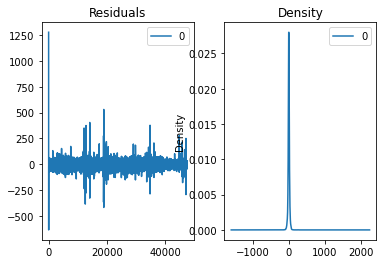

In [30]:
# Plot residual errors
residuals = pd.DataFrame(model.resid)
fig, ax = plt.subplots(1,2)
residuals.plot(title="Residuals", ax=ax[0])
residuals.plot(kind='kde', title='Density', ax=ax[1])
plt.show()

The residual errors seem fine with near zero mean and uniform variance. Let’s plot the actuals against the fitted values using plot_predict().

In [31]:
y_pred = model.predict(dynamic=False)

In [32]:
y_pred

0           5.262591
1        1282.043663
2        1276.891350
3        1225.819149
4        1185.942759
            ...     
47419    1244.230820
47420    1271.111052
47421    1293.049247
47422    1241.888560
47423    1225.501623
Name: predicted_mean, Length: 47424, dtype: float64

In [33]:
y_true = df.DEMAND

In [34]:
y_true

0        1282.0
1        1277.0
2        1226.0
3        1186.0
4        1157.0
          ...  
47419    1276.0
47420    1291.0
47421    1279.0
47422    1246.0
47423    1208.0
Name: DEMAND, Length: 47424, dtype: float64

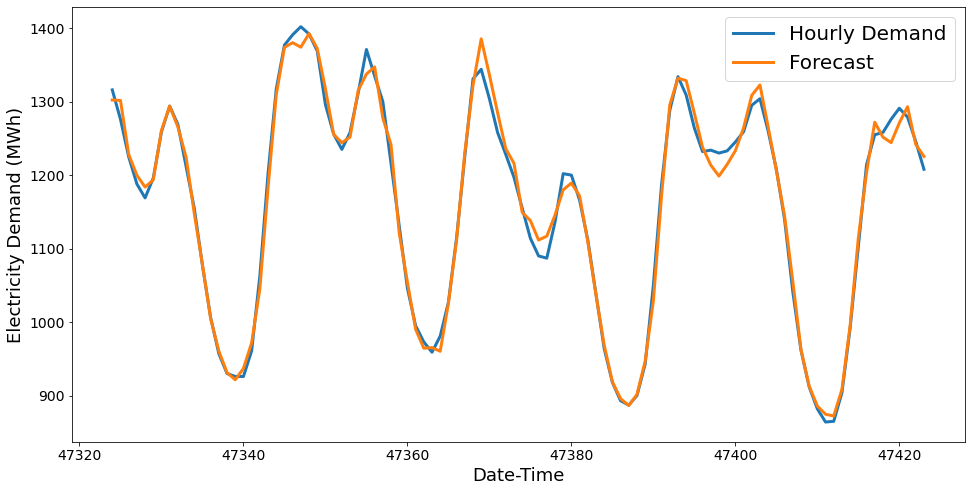

In [35]:
fig = plt.figure(figsize=(16,8))
plt.plot(y_true[-100:],linewidth=3, label='Hourly Demand')
plt.plot(y_pred[-100:], linewidth=3, label='Forecast')
plt.xlabel('Date-Time', fontsize=18)
plt.ylabel('Electricity Demand (MWh)', fontsize=18)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.legend(fontsize=20)

In [36]:
mse = mean_squared_error(y_true, y_pred)
rmse = np.sqrt(mse)
rmse

22.513699533986962

**try predicting into the future**

In [43]:
df.tail(100)

,DATE,SHORTDATE,Temperature,Precipitation,Humidity,Condition,Pressure,Visibility,WindDirection,WindSpeed,DEMAND
47324,2021-03-01 20:53:00,2021-03-01,50.0,0.0,71.0,CLR,30.06,10.0,Calm,0.0,1316.0
47325,2021-03-01 21:53:00,2021-03-01,49.0,0.0,66.0,FEW,30.07,10.0,Calm,0.0,1276.0
47326,2021-03-01 22:53:00,2021-03-01,47.0,0.0,74.0,CLR,30.07,10.0,Calm,0.0,1225.0
47327,2021-03-01 23:53:00,2021-03-01,44.0,0.0,85.0,BKN,30.07,10.0,South,3.0,1188.0
47328,2021-03-02 00:53:00,2021-03-02,43.0,0.0,86.0,FEW,30.05,10.0,Calm,0.0,1169.0
...,...,...,...,...,...,...,...,...,...,...,...
47419,2021-03-05 19:53:00,2021-03-05,46.0,0.0,71.0,FEW,29.92,10.0,South,6.0,1276.0
47420,2021-03-05 20:53:00,2021-03-05,45.0,0.0,71.0,FEW,29.91,10.0,South,6.0,1291.0
47421,2021-03-05 21:53:00,2021-03-05,46.0,0.0,68.0,CLR,29.91,10.0,South,6.0,1279.0
47422,2021-03-05 22:53:00,2021-03-05,45.0,0.0,71.0,CLR,29.89,10.0,South,8.0,1246.0


## Out of sample forecasting with ARIMA (1,1,0)

**NOTE: forecast converges to the mean using all of the data**

In [47]:
train = int(.66*len(df.DEMAND))

In [48]:
train

31299

In [49]:
future_model = ARIMA(df.DEMAND[:train], order=(1,1,0))

In [51]:
future_model = future_model.fit()

In [55]:
pred_dynamic = future_model.get_prediction(start=31299, end=len(df), dynamic=True, 
                                           full_results=True)

In [58]:
pred_dynamic

In [63]:
pred_dynamic.predicted_mean[-20000:]

31299    1037.571433
31300    1034.302732
31301    1031.890121
31302    1030.109386
31303    1028.795036
            ...     
47420    1025.090971
47421    1025.090971
47422    1025.090971
47423    1025.090971
47424    1025.090971
Name: predicted_mean, Length: 16126, dtype: float64

The Root Mean Squared Error of our forecasts is 198.87006612358735


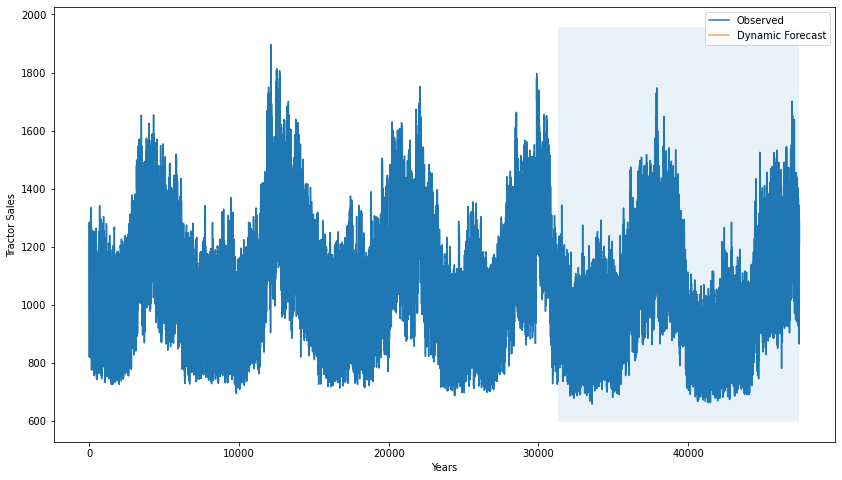

In [65]:
#pred_dynamic.conf_int?
#pred_dynamic.predicted_mean?

# Extract the predicted and true values of our time series
sales_ts_forecasted_dynamic = pred_dynamic.predicted_mean

# Extract the cI
pred_dynamic_ci = np.power(10, pred_dynamic.conf_int())

# Extract Actual values
sales_ts_truth = df.DEMAND[31299:]

# Compute the mean square error of one-step ahead forecasts
mse = ((sales_ts_forecasted_dynamic - sales_ts_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

_ = plt.figure(figsize=(14, 8))
_ = axis = df.DEMAND.plot(label='Observed')
_ = np.power(10, sales_ts_forecasted_dynamic).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
_ = axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], 
                      pred_dynamic_ci.iloc[:, 1], 
                      color='k', alpha=.25)
_ = axis.fill_betweenx(axis.get_ylim(), 31299, 
                       df.DEMAND.index[-1], alpha=.1, 
                       zorder=-1)
_ = axis.set_xlabel('Years')
_ = axis.set_ylabel('Tractor Sales')
_ = plt.legend(loc='best')
_ = plt.show()
_ = plt.close()

## Out of sample forecasting with ARIMA (1,1,0) with fewer samples

**NOTE: forecast converges to the mean using all of the data -> must try using less data**

In [70]:
# use four weeks worth of hourly recordings
train = 24*7*4
test = int(train *.2)

In [76]:
train

672

In [71]:
test

134

In [82]:
df.DEMAND[-(train+test):-test]

46618     934.0
46619     925.0
46620     949.0
46621     988.0
46622    1097.0
          ...  
47285    1288.0
47286    1232.0
47287    1154.0
47288    1096.0
47289    1045.0
Name: DEMAND, Length: 672, dtype: float64

In [81]:
len(df)-test

47290

In [77]:
future_model = ARIMA(df.DEMAND[-(train+test):-test], order=(1,1,0))

In [78]:
future_model = future_model.fit()

In [83]:
pred_dynamic = future_model.get_prediction(start=len(df)-test, end=len(df), dynamic=True, 
                                           full_results=True)

/Users/michaeljehl/opt/anaconda3/envs/metis/lib/python3.8/site-packages/statsmodels/tsa/statespace/kalman_filter.py:2290: ValueWarning: Dynamic prediction specified to begin during out-of-sample forecasting period, and so has no effect.
  warn('Dynamic prediction specified to begin during'


In [84]:
pred_dynamic.predicted_mean

93908    898.938721
93909    898.938721
93910    898.938721
93911    898.938721
93912    898.938721
            ...    
94038    898.938721
94039    898.938721
94040    898.938721
94041    898.938721
94042    898.938721
Name: predicted_mean, Length: 135, dtype: float64

The Root Mean Squared Error of our forecasts is nan


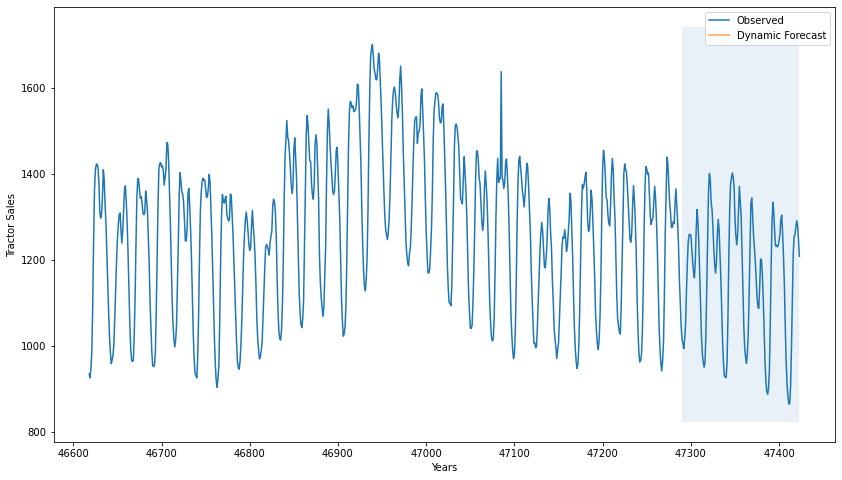

In [88]:
#pred_dynamic.conf_int?
#pred_dynamic.predicted_mean?

# Extract the predicted and true values of our time series
sales_ts_forecasted_dynamic = pred_dynamic.predicted_mean

# Extract the cI
pred_dynamic_ci = np.power(10, pred_dynamic.conf_int())

# Extract Actual values
sales_ts_truth = df.DEMAND[-test:]

# Compute the mean square error of one-step ahead forecasts
mse = ((sales_ts_forecasted_dynamic - sales_ts_truth) ** 2).mean()
print('The Root Mean Squared Error of our forecasts is {}'.format(np.sqrt(round(mse, 4))))

_ = plt.figure(figsize=(14, 8))
_ = axis = df.DEMAND[-(train+test):].plot(label='Observed')
_ = np.power(10, sales_ts_forecasted_dynamic).plot(ax=axis, label='Dynamic Forecast', alpha=0.7)
_ = axis.fill_between(pred_dynamic_ci.index, pred_dynamic_ci.iloc[:, 0], 
                      pred_dynamic_ci.iloc[:, 1], 
                      color='k', alpha=.25)
_ = axis.fill_betweenx(axis.get_ylim(), len(df)-test, 
                       df.DEMAND.index[-1], alpha=.1, 
                       zorder=-1)
_ = axis.set_xlabel('Years')
_ = axis.set_ylabel('Tractor Sales')
_ = plt.legend(loc='best')
_ = plt.show()
_ = plt.close()